В современном мире огромные объемы данных создаются и собираются ежедневно, что требует эффективных методов их анализа и интерпретации. Одним из ключевых инструментов работы с такими данными является кластеризация. Этот метод позволяет разделять данные на группы (кластеры) на основе их схожести, что делает его неотъемлемой частью анализа данных во многих областях.

В основу данного исследования вошли данные о продаваемых квартирах  в городе Москва(6983 квартир), датасет содержит 6 параметров по которым сравниваются квартиры:цена, длительность ходьбы до метро, регион москвы, площадь квартиры и количество комнат. Эта тема заинтересовала нас своей постоянной актуальностью, ведь проблема покупки недвижимости появляется в жизни каждого человека.

У инвестора или обычного домохозяйства, вкладывающего свои средства в недвижимость(в данном случае квартиру) стоит задача промаксимизировать свою полезность от данной покупки, или другими словами найти как можно более выгодное предложение. Этим проектом мы хотим решить эту задачу и разделить все квартиры на клатсеры по выгодности предполагаемой покупки.



In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQRyVmT70tFl0XAMUTCb4CcuscJse7pLFExSZBJXzuuyfcUxg0drqnXtVQHxG11dY15BwKE4tIIU9_G/pub?gid=1426823152&single=true&output=csv', usecols=['price',
'min_to_metro', 'region_of_moscow', 'total_area', 'is_new', 'number_of_rooms'])
df

,price,min_to_metro,region_of_moscow,total_area,is_new,number_of_rooms
0,31633073.0,24.0,ЮАО,64.2,1.0,2.0
1,29293000.0,9.0,СВАО,78.1,1.0,2.0
2,30349669.0,5.0,ЮАО,72.4,1.0,2.0
3,31845511.0,19.0,ЮАО,69.2,1.0,2.0
4,38810000.0,27.0,ЗАО,66.9,1.0,2.0
...,...,...,...,...,...,...
6978,29504877.0,6.0,САО,86.1,0.0,4.0
6979,120000000.0,2.0,ЦАО,163.5,0.0,4.0
6980,165000000.0,7.0,ЦАО,154.0,0.0,4.0
6981,21500000.0,11.0,ЮВАО,94.2,0.0,4.0


Мы взяли реальные данные с сайта:

In [ ]:
## Смотрим выбросы в данных
df.isna().sum()

,0
price,22
min_to_metro,137
region_of_moscow,91
total_area,23
is_new,34
number_of_rooms,0


In [ ]:
## Введем рейтинг районов Москвы
areas = {"ЦАО": 1, "ЗАО": 2, "ЮЗАО": 3, "СЗАО": 4, "САО": 5, "СВАО": 6, "ВАО": 7, "ЮАО": 8, "ЮВАО": 9}
df['region_of_moscow'] = df['region_of_moscow'].map(areas)
df

,price,min_to_metro,region_of_moscow,total_area,is_new,number_of_rooms
0,31633073.0,24.0,8.0,64.2,1.0,2.0
1,29293000.0,9.0,6.0,78.1,1.0,2.0
2,30349669.0,5.0,8.0,72.4,1.0,2.0
3,31845511.0,19.0,8.0,69.2,1.0,2.0
4,38810000.0,27.0,2.0,66.9,1.0,2.0
...,...,...,...,...,...,...
6978,29504877.0,6.0,5.0,86.1,0.0,4.0
6979,120000000.0,2.0,1.0,163.5,0.0,4.0
6980,165000000.0,7.0,1.0,154.0,0.0,4.0
6981,21500000.0,11.0,9.0,94.2,0.0,4.0


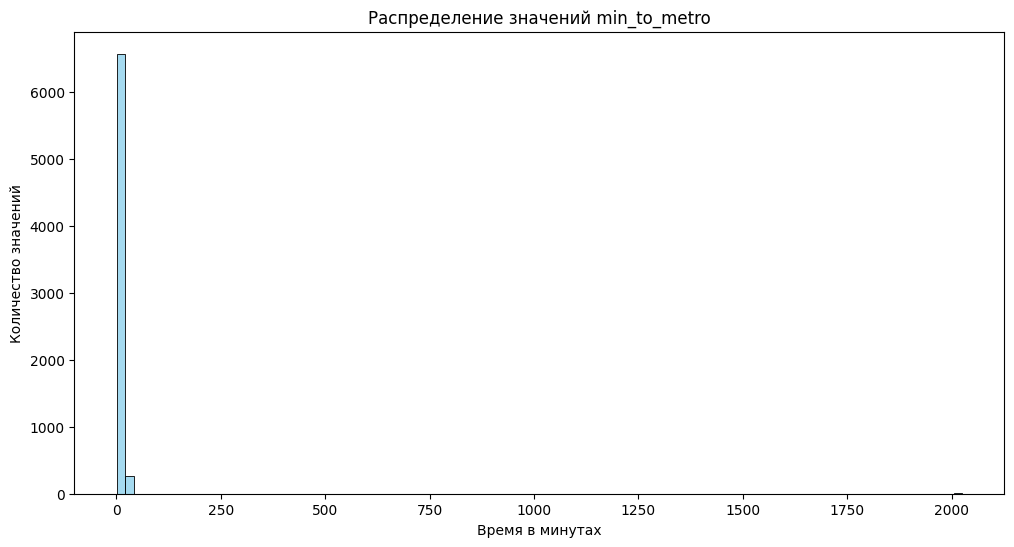

In [ ]:
## Построим распределение 'min_to_metro'
plt.figure(figsize=(12, 6))
sns.histplot(df['min_to_metro'], bins=100, color='skyblue')
plt.title('Распределение значений min_to_metro')
plt.xlabel('Время в минутах')
plt.ylabel('Количество значений')
plt.show()
## На графике заметно, что значения min_to_metro > 60 являются выбросами

In [ ]:
## Убираем выбросы
df = df[df['min_to_metro'] <= 60]

## сброс старых индексов
df.reset_index(inplace=True)

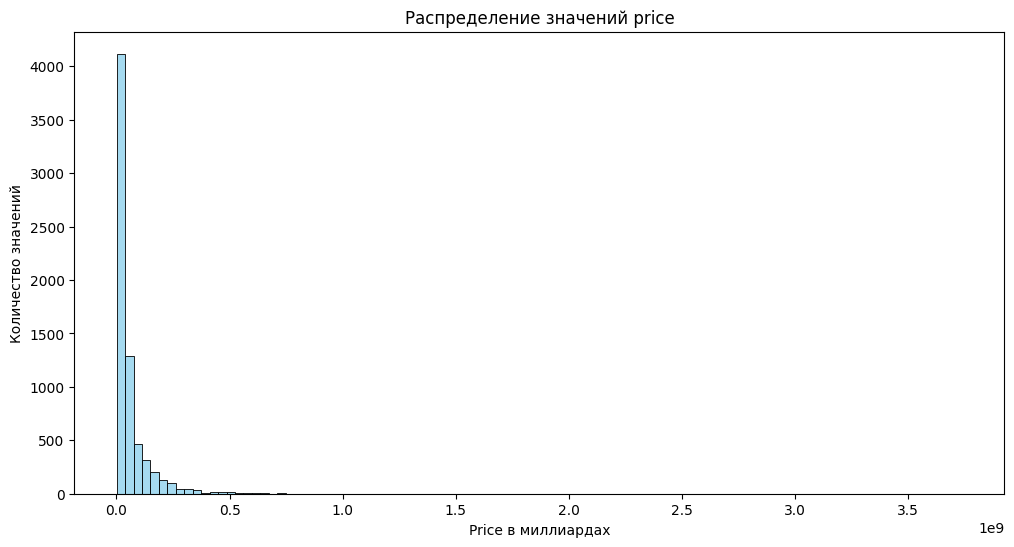

In [ ]:
## Построим распределение
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=100, color='skyblue')
plt.title('Распределение значений price')
plt.xlabel('Price в миллиардах')
plt.ylabel('Количество значений')
plt.show()
## На графике видно, что значения price > 500 млн незначительны и являются выбросами

In [ ]:
## Уберем выбросы
## Наш бюджет 250 млн рублей, поэтому мы не будем рассматривать более дорогие варианты
## Квартиры стоимостью менее 3 млн рублей не вызывают доверия, т.к цена слишком маленькая для Москвы
df = df[(df['price'] <= 250000000) & (df['price'] >= 3000000)]
df

,price,min_to_metro,region_of_moscow,total_area,is_new,number_of_rooms
0,31633073.0,24.0,8.0,64.2,1.0,2.0
1,29293000.0,9.0,6.0,78.1,1.0,2.0
2,30349669.0,5.0,8.0,72.4,1.0,2.0
3,31845511.0,19.0,8.0,69.2,1.0,2.0
4,38810000.0,27.0,2.0,66.9,1.0,2.0
...,...,...,...,...,...,...
6978,29504877.0,6.0,5.0,86.1,0.0,4.0
6979,120000000.0,2.0,1.0,163.5,0.0,4.0
6980,165000000.0,7.0,1.0,154.0,0.0,4.0
6981,21500000.0,11.0,9.0,94.2,0.0,4.0


# Описательная статистика

In [ ]:
## описательная статистика
df.describe()

,index,price,min_to_metro,region_of_moscow,total_area,is_new,number_of_rooms
count,6597.000000,6.597000e+03,6597.000000,6529.000000,6597.000000,6588.000000,6597.000000
mean,3425.185084,4.805022e+07,10.317569,4.132639,79.445312,0.268367,2.445506
std,2005.708652,4.949747e+07,5.753920,2.702722,44.054126,0.443143,1.076491
min,0.000000,3.000000e+06,1.000000,1.000000,9.000000,0.000000,1.000000
25%,1687.000000,1.620000e+07,6.000000,2.000000,44.500000,0.000000,2.000000
50%,3388.000000,2.970553e+07,10.000000,4.000000,69.000000,0.000000,2.000000
75%,5141.000000,5.600000e+07,14.000000,6.000000,101.400000,1.000000,3.000000
max,6982.000000,2.500000e+08,60.000000,9.000000,455.000000,1.000000,4.000000


Все признаки измеряются в количественных шкалах, для того, чтобы было легче анализировать и разделять на кластеры. Количественные данные в этом случае наиболее привлекательны для анализа.

Из таблички выше можно сделать следующие интересные выводы:

1) Наиболее изменчивым признаком является количесвто минут до метро(это можно заметить из стандартного отклонения

2)Средняя площадь продаваемых квартир равняется 79 кв.м

3)Чаще всего продаются двухкомнатные квартиры

4)Чаще всего продаются старые квартиры

In [ ]:
# Определение числовых столбцов
numeric_columns = ['price',	'min_to_metro',	'region_of_moscow', 'total_area', 'is_new', 'number_of_rooms']

# заполняем числовые пропуски средним значением столбца
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Min-Max Scaling (масштабирование в диапазон [0, 1])
min_max_scaler = MinMaxScaler()
df[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

## сделаем переменные price, min_to_metro, region_of_moscow минимизируемыми
df['price'] = 1 - df['price']
df['min_to_metro'] = 1 - df['min_to_metro']
df['region_of_moscow'] = 1 - df['region_of_moscow']

# Изобразим данные в зависимости от типа

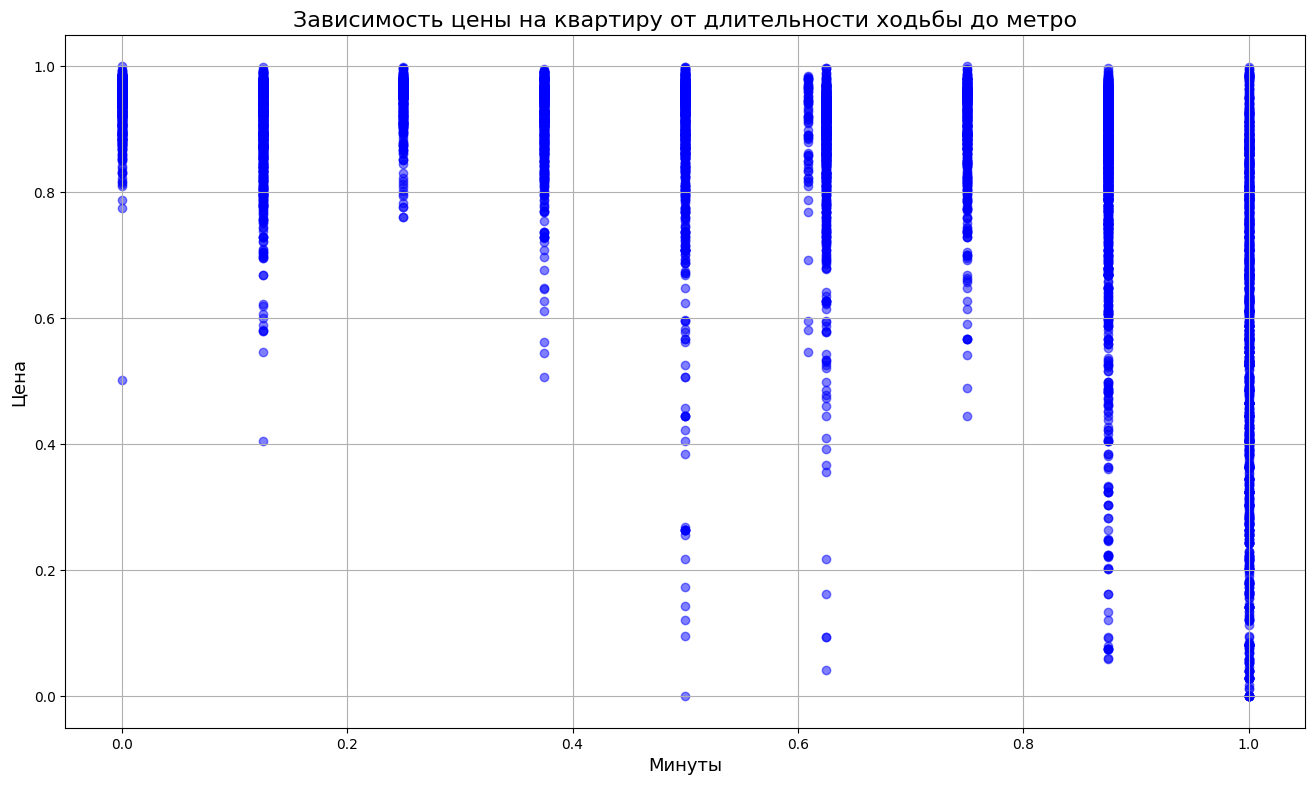

In [ ]:
import matplotlib.pyplot as plt
x = df['region_of_moscow']
y = df['price']
plt.figure(figsize = (16, 9))
plt.scatter(
            x,
            y,
            c='blue',
            alpha=0.5,
           )

# Подписать график
plt.title("Зависимость цены на квартиру от региона",fontsize=16)
# Подписать оси
plt.ylabel("Цена", fontsize=13)
plt.xlabel("Регион", fontsize=13)
plt.grid()
plt.show()

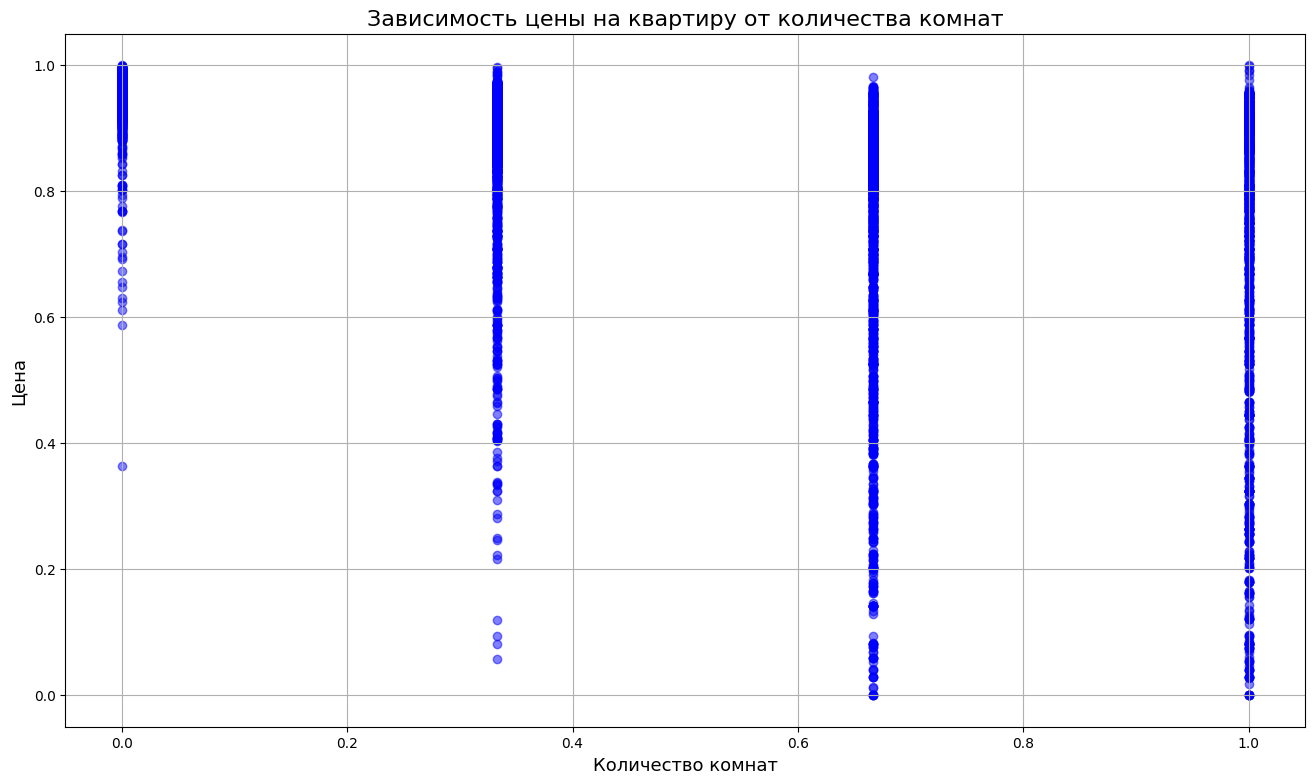

In [ ]:
import matplotlib.pyplot as plt
x = df['number_of_rooms']
y = df['price']
plt.figure(figsize = (16, 9))
plt.scatter(
            x,
            y,
            c='blue',
            alpha=0.5,
           )

# Подписать график
plt.title("Зависимость цены на квартиру от количества комнат",fontsize=16)
# Подписать оси
plt.ylabel("Цена", fontsize=13)
plt.xlabel("Количество комнат", fontsize=13)
plt.grid()
plt.show()

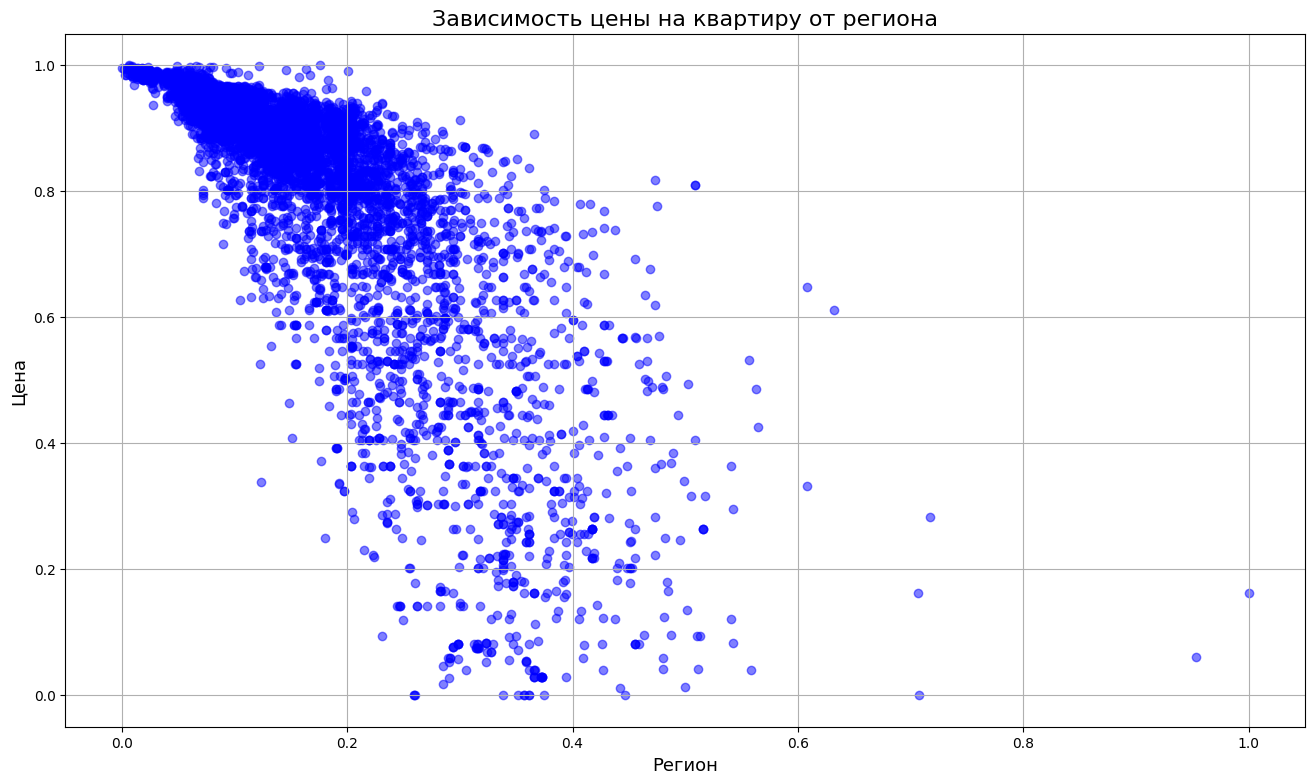

In [ ]:
import matplotlib.pyplot as plt
x = df['total_area']
y = df['price']
plt.figure(figsize = (16, 9))
plt.scatter(
            x,
            y,
            c='blue',
            alpha=0.5,
           )

# Подписать график
plt.title("Зависимость цены на квартиру от региона",fontsize=16)
# Подписать оси
plt.ylabel("Цена", fontsize=13)
plt.xlabel("Регион", fontsize=13)
plt.grid()
plt.show()
#нужно понимать, что это нормированные данные

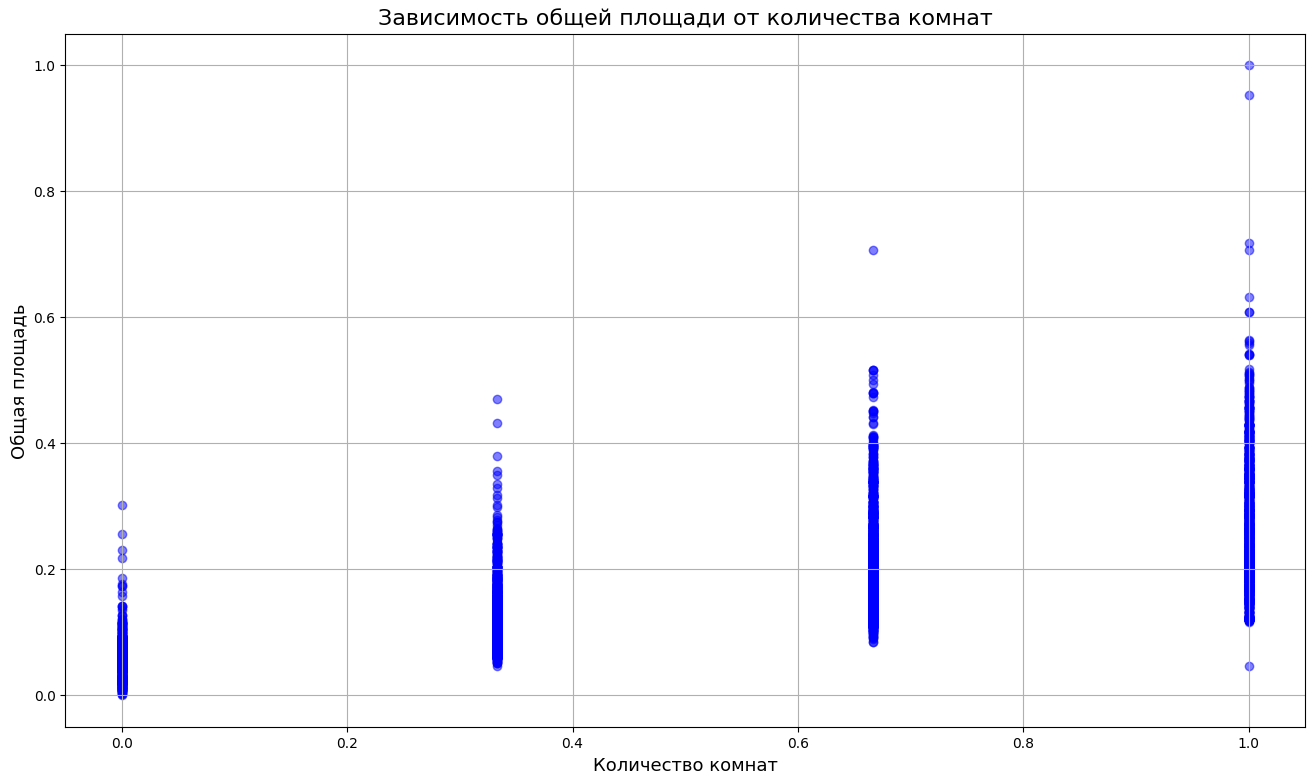

In [ ]:
import matplotlib.pyplot as plt
x = df['number_of_rooms']
y = df['total_area']
plt.figure(figsize = (16, 9))
plt.scatter(
            x,
            y,
            c='blue',
            alpha=0.5,
           )

# Подписать график
plt.title("Зависимость общей площади от количества комнат",fontsize=16)
# Подписать оси
plt.ylabel("Общая площадь", fontsize=13)
plt.xlabel("Количество комнат", fontsize=13)
plt.grid()
plt.show()

### Кластеризуем данные с помощью алгоритма K-Means.

1) Вначале с помощью метода плеча найдем оптимальное количество кластеров

2) Кластеризуем с учетом оптимального количества кластеров.

Смысл алгоритма заключается в том, чтобы выбрать k случайных центральных точек(если оптимальное количество кластеров k), отнести оставшиеся точки к одному из k кластеров на основе вычисления расстояния до центра кластера. После этого пересчитать центры кластеров как среденеарифметическое. Повторять это до тех пор, пока центры кластером не будут силно отличаться.

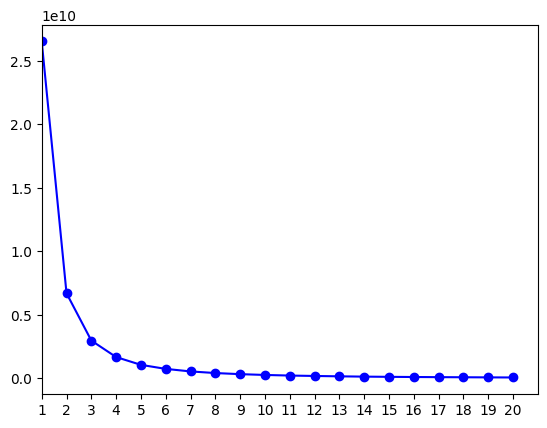

In [ ]:
## найдем оптимальное количество кластеров методом плеча
sse = [] #sum of squared error
for k in range(1,21):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(df)
    sse.append(km.inertia_)
plt.xlim(1, 21)
plt.xticks(ticks=np.arange(1, 21))
plt.plot(range(1, 21), sse, marker='o', linestyle='-', color='b', label='Значения Y')


## из графика видно, что при количестве кластеров, равных 2, суммарное расстояние
## до центров кластеров имеет наибольшее падение, так что оптимальное колчество кластеров будет равняться двум

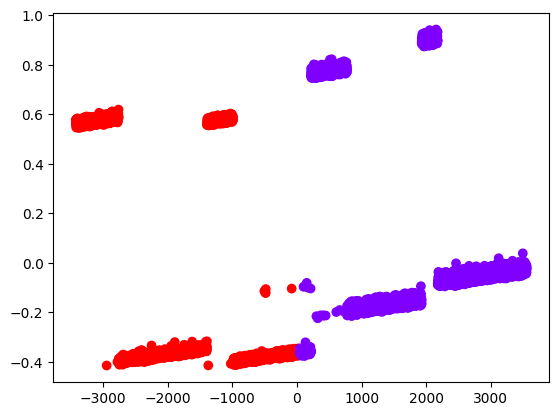

In [ ]:
## применим этот алгоритм с n_clusters = 2
km = KMeans(n_clusters=2)
km.fit(df)
km_clusters = km.fit_predict(df)


# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(df)
pca_2d = pd.DataFrame(pca.transform(df))

# Представляем результат в двумерных координатах
plt.scatter(pca_2d.loc[:, 0], pca_2d.loc[:, 1], c=km.labels_, cmap='rainbow')

plt.show()

Полученные результаты: получилось 2 кластера. Объекты первого кластера(фиолетовый цвет) - невыгодные предложения, а второго(красный цвет) - выгодные для инвестирования квартиры.



Кластеризуем данные с помощь алгоритма DBSCAN

1) Найдем оптимальное значение epsilon и minpoints для данного набора значений

2) Кластеризуем с учетом оптимального epsilon

Смысл алгоритма заключается в том, чтобы взять любой не рассмотренный ранее объект и определить соседей данного объекта на расстоянии менее epsilon. Если соседей>minpoints, то данный объект - первый элемент данного кластера(иначе это выброс), все его соседи удовлетворяющие условию расстояние < epsilon тоже становятся чатстью этого же кластера.
Так повторяется для всех элементов данного кластера.

In [ ]:
## применяем метод DBSCAN

## minsamples >= количество признаков + 1, поэтому будем использовать значение 7

## функция для вычисления параметра eps методом перебора через вычисление Silhouette score
def choose_eps(X, eps_values):
    best_eps = None
    best_score = -1  # Начальное значение для Silhouette score

    for eps in eps_values:
        db = DBSCAN(eps=eps, min_samples=7)
        clusters = db.fit_predict(X)

        # Игнорируем ситуации с одним большим кластером (значения -1 - шум)
        if len(set(clusters)) > 1:
            score = silhouette_score(X, clusters)
            ## обновляем лучшее значение
            if score > best_score:
                best_score = score
                best_eps = eps
    return best_eps

# Генерация набора значений eps для тестирования
eps_values = np.linspace(0.1, 10, 1000)

# Поиск лучшего значения eps
best_eps = choose_eps(df, eps_values)



In [ ]:
best_eps

5.035135135135135

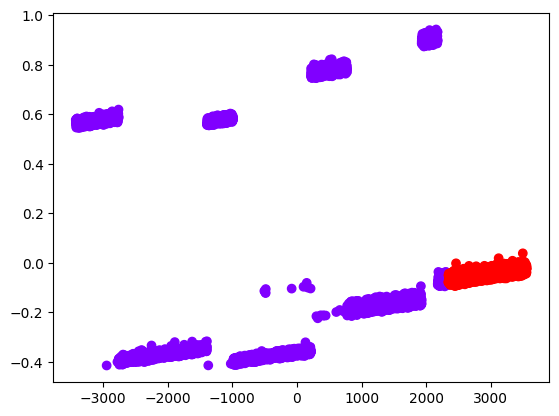

In [ ]:
## применяем алгоритм DBSCAN для best_eps

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(df)
pca_2d = pd.DataFrame(pca.transform(df))

dbscan_cluster1 = DBSCAN(eps=best_eps, min_samples=7)
dbscan_cluster1.fit(df)
db_clusters = dbscan_cluster1.fit_predict(df)
## нарисуем график в двумерных координатах
plt.scatter(pca_2d.loc[:, 0], pca_2d.loc[:, 1], c=dbscan_cluster1.labels_, cmap='rainbow')


Полученные результаты: аналогично, получилось 2 кластера.
Объекты первого кластера(фиолетовый цвет) - невыгодные предложения, а второго(красный цвет) - выгодные предложения.

Кластеризуем данные с помощью метода иерархической кластеризации

1. Изначально каждый объект образует отдельный кластер.  
2. Определяется мера, с помощью которой измеряется расстояние между кластерами.  
3. На каждом этапе объединяются два ближайших кластера.  
4. Этот процесс продолжается до тех пор, пока все объекты не окажутся в одном общем кластере.  
5. На основе полученной дендрограммы определяется оптимальное количество кластеров.

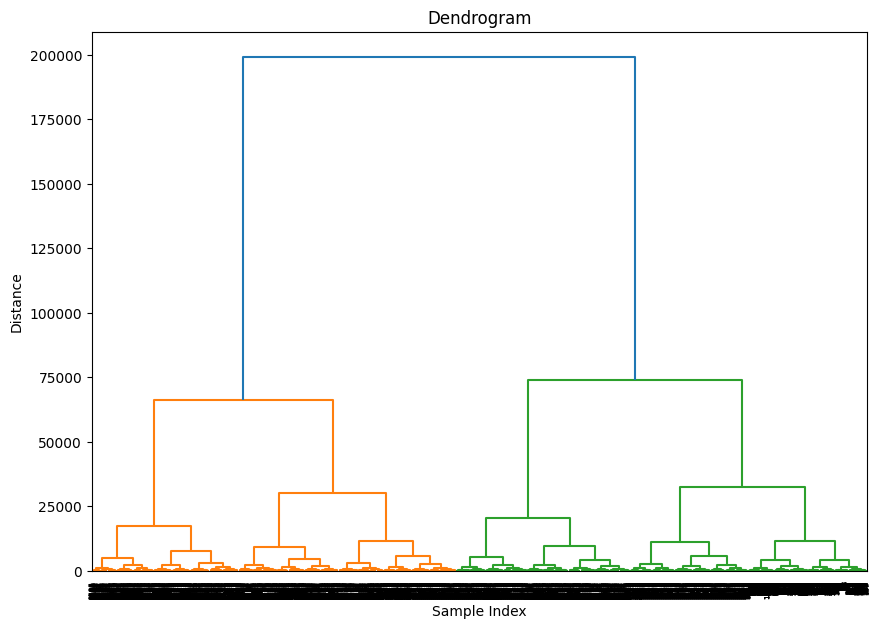

In [ ]:
## применим метод иерархической кластеризации

## применим метод варда для расстояния
Z = linkage(df, 'ward')
## нарисуем дендограмму
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## на графике видно, что лучшее количество n_clusters=2

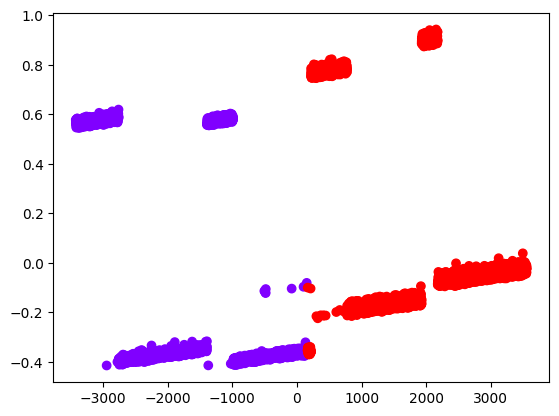

In [ ]:
max_sil_sc, opt_num = 0, 0
for i in range(1, 13):
    cluster = AgglomerativeClustering(
        n_clusters=2 ** i, linkage='ward')
    cluster.fit(df)
    agl_clusters = cluster.fit_predict(df)
    sil_sc = silhouette_score(df, agl_clusters)
    if sil_sc > max_sil_sc:
        opt_num = i
        max_sil_sc = sil_sc

cluster = AgglomerativeClustering(
n_clusters=2 ** opt_num, linkage='ward')
cluster.fit(df)
agl_clusters = cluster.fit_predict(df)

## нарисуем график в двумерных координатах
plt.scatter(pca_2d.loc[:, 0], pca_2d.loc[:, 1], c=cluster.labels_, cmap='rainbow')


Полученные результаты: аналогично предыдущим пунктам, получилось 2 кластера.
Объекты первого кластера(фиолетовый цвет) - невыгодные предложения, а второго(красный цвет) - выгодные предложения.

In [ ]:
## оценка качества моделей через silhouette_score (больше - лучше)

sc1 = silhouette_score(df, km_clusters)
sc2 = silhouette_score(df, db_clusters)
sc3 = silhouette_score(df, agl_clusters)

sc1, sc2, sc3

## KMeans и AgglomerativeClustering отработали примерно одинаково, DBSCAN показал худший результат

(0.6241028695862617, 0.4191710848608015, 0.6233942098522277)

DBSCAN отработал хуже всего, так как он отдельно ищет выбросы, а в нашей работе выбросов сравнительно немного.
KMeans и AgglomerativeClustering отработали приблизительно одинаково(можно убедиться на графике), так как расстояние между кластерами считается одинаково в этих методах.


Выводы: мы нашли множество выгодных для инвестирования квартиры, применяя один из методов KMeans или AgglomerativeClustering.
Вся работа была проделана в питоне (сорри за время выполнения), было интересно (намного интереснее чем в оранже), так как в интернете при использовании методов кластеризации берется двумерный случай, а в нашем проекте признаков много.